In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sklearn as skl
import warnings
warnings.filterwarnings("ignore")
plt.ion()

In [13]:
from matplotlib.pyplot import figure 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV,RidgeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression

In [17]:
m_price=pd.read_csv('dataset.csv')
m_price.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [19]:
m_price.iloc[:,:20].columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [21]:
col = m_price.iloc[:,:20].columns
values = m_price.iloc[:,:20].values #returns a numpy array
scaler = MaxAbsScaler()
scaled_1 = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled_1, columns=col)
scaled.head()

battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0       0.421421   0.0     0.733333       0.0  0.052632     0.0    0.109375   
1       0.511011   1.0     0.166667       1.0  0.000000     1.0    0.828125   
2       0.281782   1.0     0.166667       1.0  0.105263     1.0    0.640625   
3       0.307808   1.0     0.833333       0.0  0.000000     0.0    0.156250   
4       0.911411   1.0     0.400000       0.0  0.684211     1.0    0.687500   

   m_dep  mobile_wt  n_cores    pc  px_height  px_width       ram      sc_h  \
0    0.6      0.940    0.250  0.10   0.010204  0.378378  0.637569  0.473684   
1    0.7      0.680    0.375  0.30   0.461735  0.994995  0.658079  0.894737   
2    0.9      0.725    0.625  0.30   0.644388  0.858859  0.651076  0.578947   
3    0.8      0.655    0.750  0.45   0.620408  0.893894  0.692596  0.842105   
4    0.6      0.705    0.250  0.70   0.616327  0.606607  0.352926  0.421053   

       sc_w  talk_time  three_g  touch_screen  wifi  
0  0.388889       0.95      0.0           0.0   1.0  
1  0.166667       0.35      1.0           1.0   0.0  
2  0.111111       0.45      1.0           1.0   0.0  
3  0.444444       0.55      1.0           0.0   0.0  
4  0.111111       0.75      1.0           1.0   0.0

In [23]:
scaled['price_range'] = m_price['price_range']


In [25]:
corr_matrix=scaled.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(25,15))
with sns.axes_style("white"):
    sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, cmap=cm.Blues, cbar=False)


In [26]:
#using best 8 as per corr
#we are not considering the correlations between X features among themselves
corr = scaled.corr()
corr = corr.price_range
corr.sort_values(ascending = False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

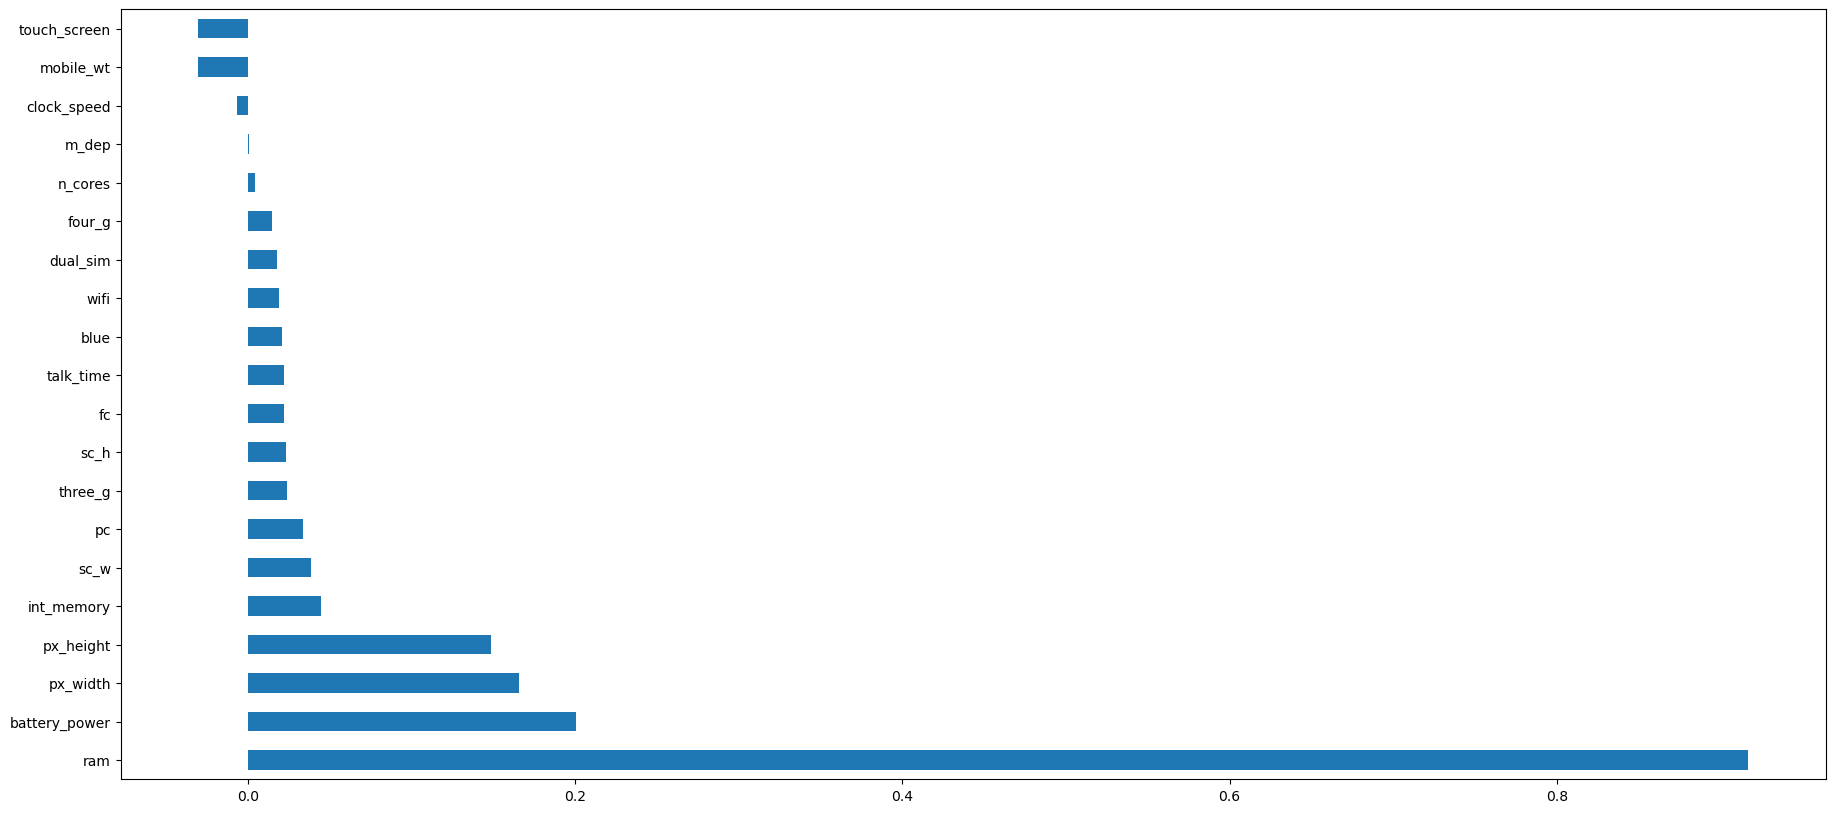

In [27]:
fig = figure(figsize=(22,10))
#sns.barplot(corr.sort_values(ascending = False))
#plt.bar(corr.sort_values(ascending = False),)
#plt.bar(x_bar,y_bar)
#plt.plot(corr.sort_values(ascending = False),marker = 'x',color='darkgreen');
corr.sort_values(ascending = False)[1:].plot(kind='barh');

<Figure size 5000x3000 with 0 Axes>

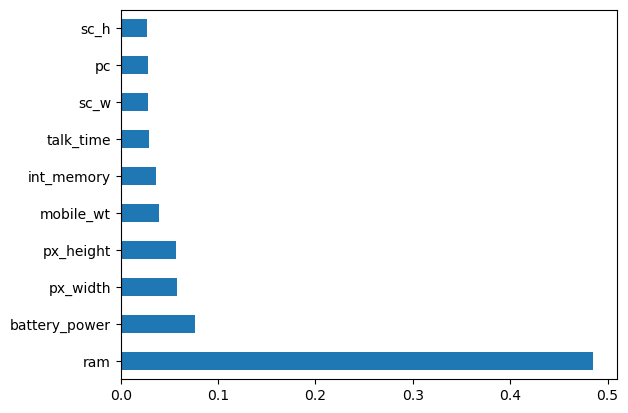

<Figure size 5000x3000 with 0 Axes>

In [28]:
#Finding out best feature using Random Forest Clssifier
X = scaled.drop(['price_range'],axis=1)
y = scaled['price_range']

model1 = RandomForestClassifier()
model1.fit(X , y)

feature_imp1 = pd.Series(model1.feature_importances_ , index = X.columns)
feature_imp1.nlargest(10).plot(kind = 'barh')
figure(num=None, figsize=(50, 30))

In [29]:
#Checking with Decision Tree 

model = DecisionTreeClassifier(criterion='gini')
model.fit(X , y)

feature_imp = pd.Series(model.feature_importances_ , index = X.columns)
feature_imp.nlargest(10).plot(kind = 'barh')
figure(num=None, figsize=(50, 30))

<Figure size 5000x3000 with 0 Axes>

<Figure size 5000x3000 with 0 Axes>

In [30]:
#Random Forest didnot give a accurate feature selection, therefore using SelectKBest
best_features = SelectKBest(score_func = chi2 , k = 10)
fit = best_features.fit(X , y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
f_score = pd.concat([df_scores , df_columns], axis = 1)
f_score.columns = ['score' , 'features']
print (f_score.nlargest(20 , 'score'))


         score       features
13  232.933346            ram
11    8.858964      px_height
0     7.072005  battery_power
12    4.910204       px_width
18    1.928429   touch_screen
5     1.521572         four_g
6     1.403736     int_memory
9     1.137194        n_cores
15    0.915573           sc_w
7     0.745820          m_dep
1     0.723232           blue
16    0.661820      talk_time
3     0.631011       dual_sim
4     0.533430             fc
14    0.506046           sc_h
8     0.479864      mobile_wt
10    0.459303             pc
19    0.422091           wifi
17    0.327643        three_g
2     0.216122    clock_speed


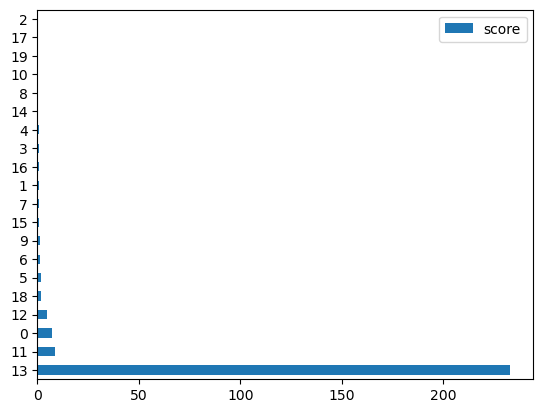

In [31]:
f_score.nlargest(20 , 'score').plot(kind='barh');

In [32]:
scaled_copy = scaled.copy()

In [33]:
#creating a new category to check if this fits within the best 8 features
scaled_copy['categorical'] = (scaled_copy["blue"].astype(bool) + \
                    scaled_copy["dual_sim"].astype(bool) + \
                    scaled_copy["four_g"].astype(bool) + \
                    scaled_copy["three_g"].astype(bool) + \
                    scaled_copy["touch_screen"].astype(bool) + \
                    scaled_copy["wifi"].astype(bool))


In [34]:
scaled_copy = scaled_copy[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'categorical','price_range' ]]
scaled_copy.head()

battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0       0.421421   0.0     0.733333       0.0  0.052632     0.0    0.109375   
1       0.511011   1.0     0.166667       1.0  0.000000     1.0    0.828125   
2       0.281782   1.0     0.166667       1.0  0.105263     1.0    0.640625   
3       0.307808   1.0     0.833333       0.0  0.000000     0.0    0.156250   
4       0.911411   1.0     0.400000       0.0  0.684211     1.0    0.687500   

   m_dep  mobile_wt  n_cores  ...  px_width       ram      sc_h      sc_w  \
0    0.6      0.940    0.250  ...  0.378378  0.637569  0.473684  0.388889   
1    0.7      0.680    0.375  ...  0.994995  0.658079  0.894737  0.166667   
2    0.9      0.725    0.625  ...  0.858859  0.651076  0.578947  0.111111   
3    0.8      0.655    0.750  ...  0.893894  0.692596  0.842105  0.444444   
4    0.6      0.705    0.250  ...  0.606607  0.352926  0.421053  0.111111   

   talk_time  three_g  touch_screen  wifi  categorical  price_range  
0       0.95      0.0           0.0   1.0         True            1  
1       0.35      1.0           1.0   0.0         True            2  
2       0.45      1.0           1.0   0.0         True            2  
3       0.55      1.0           0.0   0.0         True            2  
4       0.75      1.0           1.0   0.0         True            1  

[5 rows x 22 columns]

In [35]:
plt.figure(figsize=(30,20))
sns.heatmap(scaled_copy.corr(),annot=True,cmap=cm.Blues);
#we see that categorical doesn't make much sense

In [36]:
#We check for the same 7 features with jointplot to see the distribution concentration per price range

sns.jointplot(x='price_range',y= 'ram',data=m_price, kind='kde');

#sns.boxplot(x='price_range',y='',data=m_price,ax=ax[2,1]);
#sns.boxplot(x='price_range',y='',data=m_price,ax=ax[3,0]);

In [37]:
#PRICE RANGE FROM 0 TO 3

In [38]:
#EDA for the 8 features that we saw on Random Forest
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(12,28))

sns.boxplot(x='price_range',y='ram',data=m_price,ax=ax[0,0]);
sns.boxplot(x='price_range',y='battery_power',data=m_price,ax=ax[0,1]);
sns.boxplot(x='price_range',y='px_width',data=m_price,ax=ax[1,0]);
sns.boxplot(x='price_range',y='px_height',data=m_price,ax=ax[1,1]);
sns.boxplot(x='price_range',y='int_memory',data=m_price,ax=ax[2,0]);
sns.boxplot(x='price_range',y='sc_w',data=m_price,ax=ax[2,1]);
sns.boxplot(x='price_range',y='pc',data=m_price,ax=ax[3,0]);


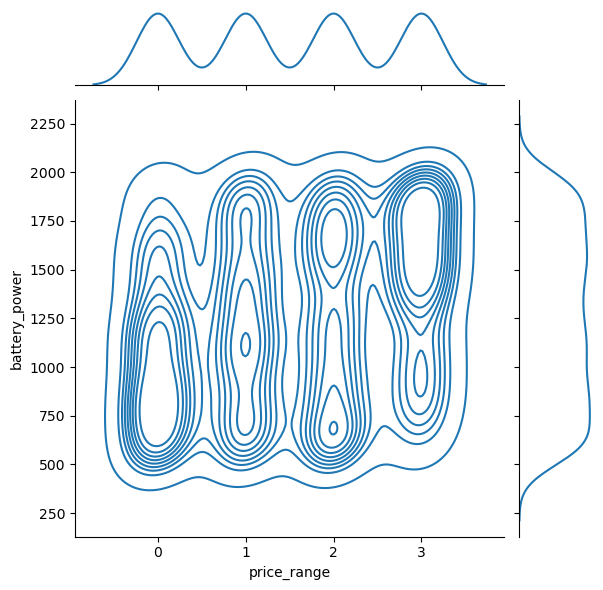

In [39]:
sns.jointplot(x='price_range',y='battery_power',data=m_price,kind='kde')

In [40]:
sns.jointplot(x='price_range',y='px_width',data=m_price,kind='kde');

In [57]:
sns.jointplot(x='price_range',y='px_height',data=m_price,kind='kde');

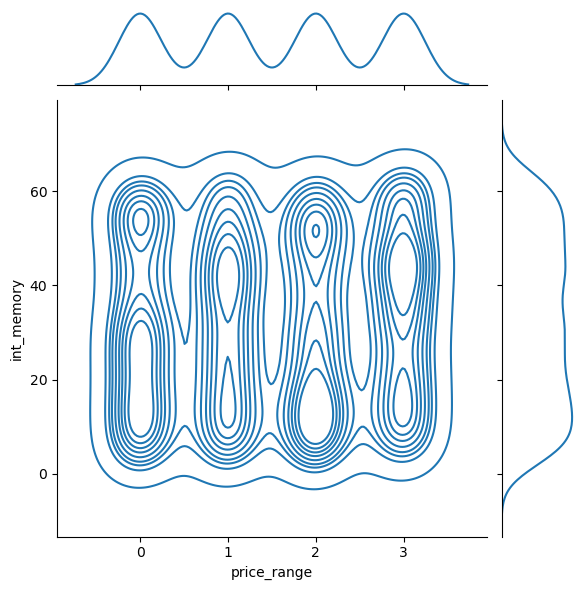

In [59]:
sns.jointplot(x='price_range',y='int_memory',data=m_price,kind='kde');

In [61]:
sns.jointplot(x='price_range',y='sc_w',data=m_price,kind='kde');

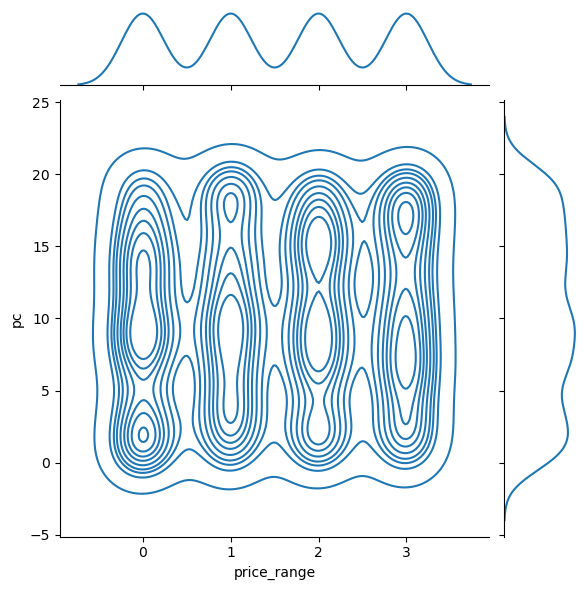

In [63]:
sns.jointplot(x='price_range',y='pc',data=m_price,kind='kde');

In [65]:
#Now we try creating different band groups for the top 7 features that we found through correlation matrix to check the percent distribution of price_range 
m_price_copy = m_price.copy()


In [67]:
pd.cut(m_price_copy.ram,5).unique()

[(2501.2, 3249.6], (1004.4, 1752.8], (252.258, 1004.4], (3249.6, 3998.0], (1752.8, 2501.2]]
Categories (5, interval[float64, right]): [(252.258, 1004.4] < (1004.4, 1752.8] < (1752.8, 2501.2] < (2501.2, 3249.6] < (3249.6, 3998.0]]

In [69]:
#we get the ranges as above and now we proceed to create bands for the other 6 features
pd.cut(m_price_copy.px_height,5).unique()
pd.cut(m_price_copy.battery_power,5).unique()
pd.cut(m_price_copy.px_width,5).unique()
pd.cut(m_price_copy.int_memory,5).unique()
pd.cut(m_price_copy.sc_w,5).unique()
pd.cut(m_price_copy.pc,5).unique()
#ram
m_price_copy.loc[m_price_copy['ram'] <= 1004.4, 'ram'] = 0
m_price_copy.loc[(m_price_copy['ram'] > 1004.4) & (m_price_copy['ram'] <= 1752.8), 'ram'] = 1
m_price_copy.loc[(m_price_copy['ram'] > 1752.8) & (m_price_copy['ram'] <= 2501.2), 'ram'] = 2
m_price_copy.loc[(m_price_copy['ram'] > 2501.2) & (m_price_copy['ram'] <= 3249.6), 'ram'] = 3
m_price_copy.loc[m_price_copy['ram'] > 3249.6 , 'ram'] = 4

#pixel_height
m_price_copy.loc[m_price_copy['px_height'] <= 392.0, 'px_height'] = 0
m_price_copy.loc[(m_price_copy['px_height'] > 392.0) & (m_price_copy['px_height'] <= 784.0), 'px_height'] = 1
m_price_copy.loc[(m_price_copy['px_height'] > 784.0) & (m_price_copy['px_height'] <= 1176.0), 'px_height']   = 2
m_price_copy.loc[(m_price_copy['px_height'] > 1176.0) & (m_price_copy['px_height'] <= 1568.0), 'px_height'] = 3
m_price_copy.loc[m_price_copy['px_height'] > 1568.0 , 'px_height'] = 4

#battery_power
m_price_copy.loc[m_price_copy['battery_power'] <= 800.4, 'battery_power'] = 0
m_price_copy.loc[(m_price_copy['battery_power'] > 800.4) & (m_price_copy['battery_power'] <= 1099.8), 'battery_power'] = 1
m_price_copy.loc[(m_price_copy['battery_power'] > 1099.8) & (m_price_copy['battery_power'] <= 1399.2), 'battery_power']   = 2
m_price_copy.loc[(m_price_copy['battery_power'] > 1399.2) & (m_price_copy['battery_power'] <= 1698.6), 'battery_power'] = 3
m_price_copy.loc[m_price_copy['battery_power'] > 1698.6 , 'battery_power'] = 4

#pixel_width
m_price_copy.loc[m_price_copy['px_width'] <= 799.6, 'px_width'] = 0
m_price_copy.loc[(m_price_copy['px_width'] > 799.6) & (m_price_copy['px_width'] <= 1099.2), 'px_width'] = 1
m_price_copy.loc[(m_price_copy['px_width'] > 1099.2) & (m_price_copy['px_width'] <= 1398.8), 'px_width']   = 2
m_price_copy.loc[(m_price_copy['px_width'] > 1398.8) & (m_price_copy['px_width'] <= 1698.4), 'px_width'] = 3
m_price_copy.loc[m_price_copy['px_width'] > 1698.4 , 'px_width'] = 4

#internal_memory
m_price_copy.loc[m_price_copy['int_memory'] <= 14.4, 'int_memory'] = 0
m_price_copy.loc[(m_price_copy['int_memory'] > 14.4) & (m_price_copy['int_memory'] <= 26.8), 'int_memory'] = 1
m_price_copy.loc[(m_price_copy['int_memory'] > 26.8) & (m_price_copy['int_memory'] <= 39.2), 'int_memory']   = 2
m_price_copy.loc[(m_price_copy['int_memory'] > 39.2) & (m_price_copy['int_memory'] <= 51.6), 'int_memory'] = 3
m_price_copy.loc[m_price_copy['int_memory'] > 51.6 , 'int_memory'] = 4

#screen_width
m_price_copy.loc[m_price_copy['sc_w'] <= 3.6, 'sc_w'] = 0
m_price_copy.loc[(m_price_copy['sc_w'] > 3.6) & (m_price_copy['sc_w'] <= 7.2), 'sc_w'] = 1
m_price_copy.loc[(m_price_copy['sc_w'] > 7.2) & (m_price_copy['sc_w'] <= 10.8), 'sc_w']   = 2
m_price_copy.loc[(m_price_copy['sc_w'] > 10.8) & (m_price_copy['sc_w'] <= 14.4), 'sc_w'] = 3
m_price_copy.loc[m_price_copy['sc_w'] > 14.4 , 'sc_w'] = 4

#primary_camera
m_price_copy.loc[m_price_copy['pc'] <= 4.0, 'pc'] = 0
m_price_copy.loc[(m_price_copy['pc'] > 4.0) & (m_price_copy['pc'] <= 8.0), 'pc'] = 1
m_price_copy.loc[(m_price_copy['pc'] > 8.0) & (m_price_copy['pc'] <= 12.0), 'pc']   = 2
m_price_copy.loc[(m_price_copy['pc'] > 12.0) & (m_price_copy['pc'] <= 16.0), 'pc'] = 3
m_price_copy.loc[m_price_copy['pc'] > 16.0 , 'pc'] = 4

In [71]:
(m_price_copy[m_price_copy.price_range == 0].ram.value_counts() * 100)/(m_price_copy[m_price_copy.price_range == 0]).ram.count()

ram
0    73.0
1    26.4
2     0.6
Name: count, dtype: float64

<Axes: xlabel='price_range', ylabel='count'>

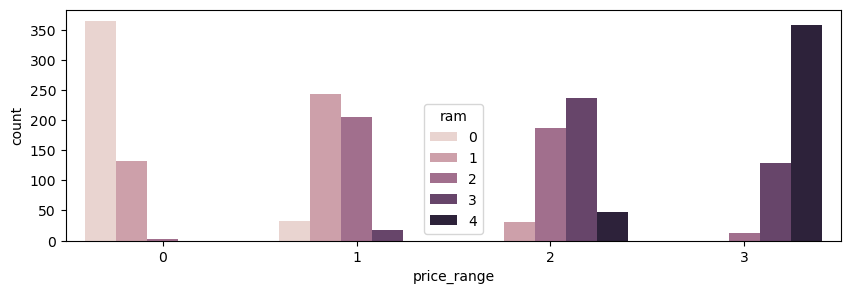

In [73]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='ram')

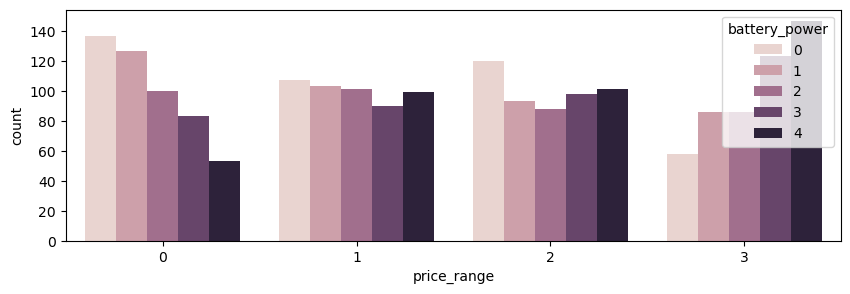

In [75]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='battery_power');

In [77]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='px_width');

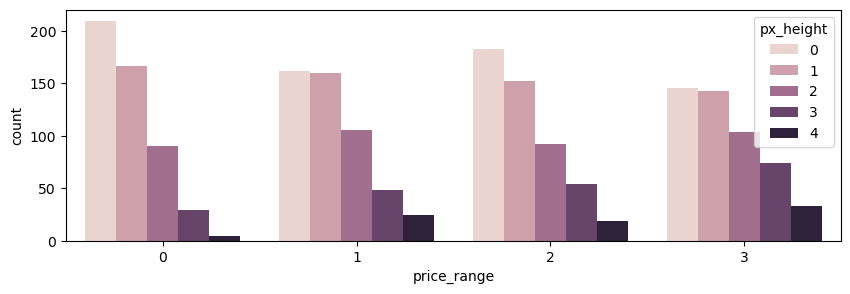

In [79]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='px_height');

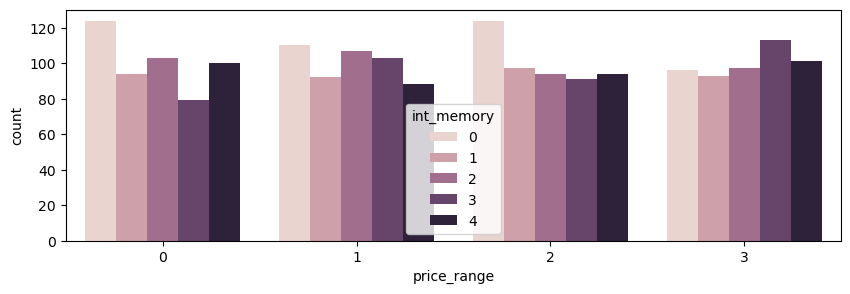

In [81]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='int_memory');

In [83]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='sc_w');

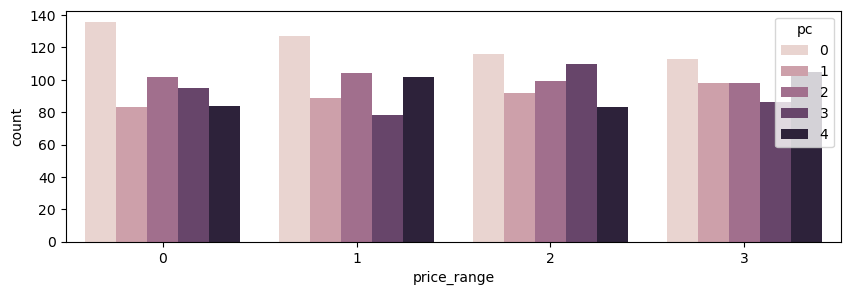

In [85]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='pc');

In [87]:
#Finding the mean values per price range and features - so as to have the mean of the handsets per price_range and per feature_range
m_price_copy['ram_actual'] = m_price.ram
m_price_copy['battery_power_actual'] = m_price.battery_power
m_price_copy['px_width_actual'] = m_price.px_width
m_price_copy['px_height_actual'] = m_price.px_height
m_price_copy['int_memory_actual'] = m_price.int_memory
m_price_copy['sc_w_actual'] = m_price.sc_w
m_price_copy['pc_actual'] = m_price.pc

In [89]:
m_price_copy[['ram','ram_actual','price_range']].head()

ram  ram_actual  price_range
0    3        2549            1
1    3        2631            2
2    3        2603            2
3    3        2769            2
4    1        1411            1

In [91]:
m_price_copy[(m_price_copy.price_range == 0)].groupby('ram').ram_actual.mean().plot(kind='barh')

<Axes: ylabel='ram'>

In [93]:
m_price_copy.groupby(['price_range','ram']).ram_actual.mean()

price_range  ram
0            0       604.635616
             1      1259.757576
             2      1892.333333
1            0       758.848485
             1      1416.827869
             2      2058.551220
             3      2610.777778
2            1      1555.000000
             2      2232.941176
             3      2814.555085
             4      3467.297872
3            2      2403.384615
             3      2992.240310
             4      3651.879888
Name: ram_actual, dtype: float64

In [95]:
m_price_copy.groupby(['price_range','battery_power']).battery_power_actual.mean()

price_range  battery_power
0            0                 645.605839
             1                 941.826772
             2                1232.900000
             3                1548.108434
             4                1860.528302
1            0                 639.420561
             1                 956.553398
             2                1242.930693
             3                1538.033333
             4                1853.858586
2            0                 639.475000
             1                 946.935484
             2                1245.352273
             3                1561.663265
             4                1848.752475
3            0                 666.672414
             1                 944.476744
             2                1265.686047
             3                1543.056911
             4                1846.632653
Name: battery_power_actual, dtype: float64

In [97]:
m_price_copy.groupby(['price_range','px_width']).px_width_actual.mean()

price_range  px_width
0            0            639.642276
             1            932.827586
             2           1257.517857
             3           1528.909091
             4           1850.245902
1            0            665.354167
             1            955.701754
             2           1248.208333
             3           1534.392857
             4           1858.300000
2            0            653.552381
             1            948.090000
             2           1244.590000
             3           1558.095238
             4           1839.244444
3            0            655.029851
             1            951.223684
             2           1259.423077
             3           1559.390476
             4           1851.506757
Name: px_width_actual, dtype: float64

In [99]:
m_price_copy.groupby(['price_range','px_height']).px_height_actual.mean()

price_range  px_height
0            0             199.242857
             1             567.748503
             2             967.411111
             3            1296.379310
             4            1721.750000
1            0             210.697531
             1             578.675000
             2             962.433962
             3            1331.666667
             4            1699.458333
2            0             198.459016
             1             570.500000
             2             968.304348
             3            1323.018519
             4            1714.789474
3            0             203.493151
             1             587.874126
             2             982.125000
             3            1347.527027
             4            1720.909091
Name: px_height_actual, dtype: float64

In [101]:
m_price_copy.groupby(['price_range','int_memory']).int_memory_actual.mean()

price_range  int_memory
0            0              8.387097
             1             20.808511
             2             32.174757
             3             45.227848
             4             57.040000
1            0              8.036364
             1             20.304348
             2             32.822430
             3             45.281553
             4             58.295455
2            0              7.935484
             1             19.628866
             2             32.319149
             3             45.659341
             4             57.223404
3            0              8.572917
             1             20.494624
             2             33.247423
             3             45.318584
             4             58.544554
Name: int_memory_actual, dtype: float64

In [103]:
m_price_copy.groupby(['price_range','sc_w']).sc_w_actual.mean()

price_range  sc_w
0            0        1.502732
             1        5.452830
             2        9.022472
             3       12.074074
             4       16.266667
1            0        1.492063
             1        5.196203
             2        8.952941
             3       12.460000
             4       15.833333
2            0        1.505556
             1        5.441860
             2        8.857143
             3       12.036364
             4       16.000000
3            0        1.507772
             1        5.284483
             2        8.929412
             3       12.026667
             4       16.096774
Name: sc_w_actual, dtype: float64

In [105]:
m_price_copy.groupby(['price_range','pc']).pc_actual.mean()

price_range  pc
0            0      1.794118
             1      6.855422
             2     10.343137
             3     14.347368
             4     18.523810
1            0      2.141732
             1      6.606742
             2     10.384615
             3     14.346154
             4     18.656863
2            0      1.905172
             1      6.695652
             2     10.323232
             3     14.645455
             4     18.542169
3            0      1.982301
             1      6.500000
             2     10.408163
             3     14.604651
             4     18.457143
Name: pc_actual, dtype: float64

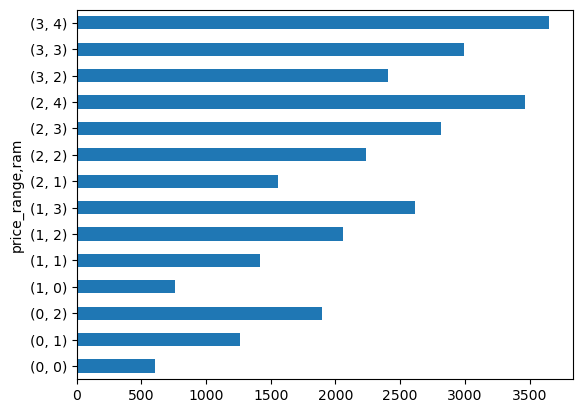

In [107]:
m_price_copy.groupby(['price_range','ram']).ram_actual.mean().plot(kind='barh');

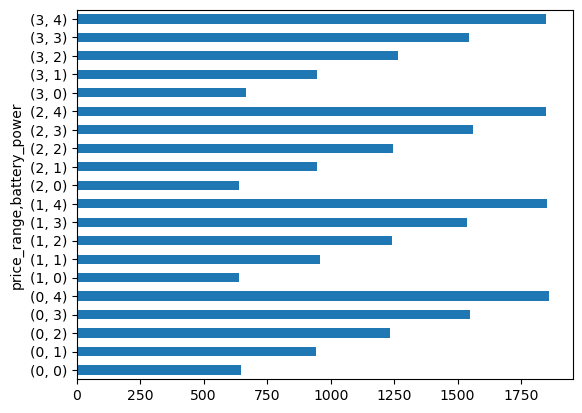

In [109]:
m_price_copy.groupby(['price_range','battery_power']).battery_power_actual.mean().plot(kind='barh');

In [111]:
m_price_copy.groupby(['price_range','px_width']).px_width_actual.mean().plot(kind='barh');

In [113]:
m_price_copy.groupby(['price_range','px_height']).px_height_actual.mean().plot(kind='barh');

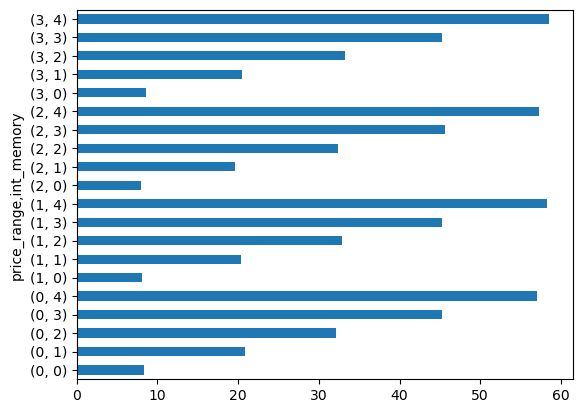

In [115]:
m_price_copy.groupby(['price_range','int_memory']).int_memory_actual.mean().plot(kind='barh');

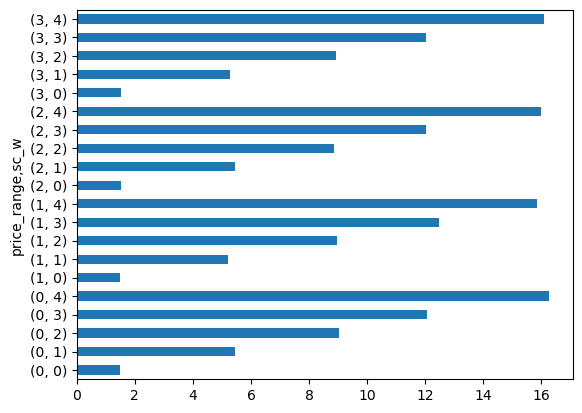

In [117]:
m_price_copy.groupby(['price_range','sc_w']).sc_w_actual.mean().plot(kind='barh');

In [119]:
m_price_copy.groupby(['price_range','pc']).pc_actual.mean().plot(kind='barh');

In [121]:
scaled.head()

battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0       0.421421   0.0     0.733333       0.0  0.052632     0.0    0.109375   
1       0.511011   1.0     0.166667       1.0  0.000000     1.0    0.828125   
2       0.281782   1.0     0.166667       1.0  0.105263     1.0    0.640625   
3       0.307808   1.0     0.833333       0.0  0.000000     0.0    0.156250   
4       0.911411   1.0     0.400000       0.0  0.684211     1.0    0.687500   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width       ram      sc_h  \
0    0.6      0.940    0.250  ...   0.010204  0.378378  0.637569  0.473684   
1    0.7      0.680    0.375  ...   0.461735  0.994995  0.658079  0.894737   
2    0.9      0.725    0.625  ...   0.644388  0.858859  0.651076  0.578947   
3    0.8      0.655    0.750  ...   0.620408  0.893894  0.692596  0.842105   
4    0.6      0.705    0.250  ...   0.616327  0.606607  0.352926  0.421053   

       sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0  0.388889       0.95      0.0           0.0   1.0            1  
1  0.166667       0.35      1.0           1.0   0.0            2  
2  0.111111       0.45      1.0           1.0   0.0            2  
3  0.444444       0.55      1.0           0.0   0.0            2  
4  0.111111       0.75      1.0           1.0   0.0            1  

[5 rows x 21 columns]

In [123]:
scaled_copy.dtypes

battery_power    float64
blue             float64
clock_speed      float64
dual_sim         float64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time        float64
three_g          float64
touch_screen     float64
wifi             float64
categorical         bool
price_range        int64
dtype: object

In [125]:
scaled_copy.categorical = scaled_copy.categorical.astype(bool)

In [127]:
scaled_copy.head()

battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0       0.421421   0.0     0.733333       0.0  0.052632     0.0    0.109375   
1       0.511011   1.0     0.166667       1.0  0.000000     1.0    0.828125   
2       0.281782   1.0     0.166667       1.0  0.105263     1.0    0.640625   
3       0.307808   1.0     0.833333       0.0  0.000000     0.0    0.156250   
4       0.911411   1.0     0.400000       0.0  0.684211     1.0    0.687500   

   m_dep  mobile_wt  n_cores  ...  px_width       ram      sc_h      sc_w  \
0    0.6      0.940    0.250  ...  0.378378  0.637569  0.473684  0.388889   
1    0.7      0.680    0.375  ...  0.994995  0.658079  0.894737  0.166667   
2    0.9      0.725    0.625  ...  0.858859  0.651076  0.578947  0.111111   
3    0.8      0.655    0.750  ...  0.893894  0.692596  0.842105  0.444444   
4    0.6      0.705    0.250  ...  0.606607  0.352926  0.421053  0.111111   

   talk_time  three_g  touch_screen  wifi  categorical  price_range  
0       0.95      0.0           0.0   1.0         True            1  
1       0.35      1.0           1.0   0.0         True            2  
2       0.45      1.0           1.0   0.0         True            2  
3       0.55      1.0           0.0   0.0         True            2  
4       0.75      1.0           1.0   0.0         True            1  

[5 rows x 22 columns]

In [129]:
scaled_copy.categorical.unique()

array([ True, False])

In [131]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X1=ss.fit_transform(X=X) #scaling the features matrix

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.3)
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:97.78571428571429
Test Set Accuracy:96.83333333333334


In [135]:
#SVC model with only the important features got more accuracy
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
#SVC classifier
model = SVC()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:98.57142857142858
Test Set Accuracy:86.5

Confusion Matrix:
[[142  12   0   0]
 [ 14 121  24   0]
 [  0   9 117  15]
 [  0   0   7 139]]


In [137]:
#Decision Tree Classifier classifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

#As it is Seen,Decision tree overfits the data, resulting in pretty low test accuracy

Train Set Accuracy:100.0
Test Set Accuracy:83.66666666666667

Confusion Matrix:
[[136  13   0   0]
 [ 20 111  11   0]
 [  0  18 118  17]
 [  0   0  19 137]]


In [139]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Classifier classifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:89.5

Confusion Matrix:
[[140   5   0   0]
 [ 16 127  10   0]
 [  0  10 129  13]
 [  0   0   9 141]]


In [141]:
#Random Forest Classifier
param_grid={"criterion":['gini','entropy'],"n_estimators":[8,10,12]}
model = RandomForestClassifier()
model1 = GridSearchCV(model,n_jobs=-1,param_grid=param_grid)
model1.fit(X_train,y_train)
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:99.5
Test Set Accuracy:80.66666666666666

Confusion Matrix:
[[146  23   0   0]
 [ 10 106  25   2]
 [  0  12 103  23]
 [  0   1  20 129]]


In [143]:
scaled.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [145]:
X_new = scaled[['ram','battery_power','px_width','px_height','int_memory','sc_w','pc']].values#,'touch_screen','mobile_wt']].values
y_new = scaled['price_range'].values
X1=ss.fit_transform(X=X_new)
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.3)

In [147]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:96.14285714285714
Test Set Accuracy:95.83333333333334


In [149]:
model = SVC()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


from sklearn.metrics import classification_report
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print(classification_report(y_test,y_test_pred))

Train Set Accuracy:96.71428571428572
Test Set Accuracy:91.5

Confusion Matrix:
[[134  11   0   0]
 [  9 130   9   0]
 [  0   9 139   9]
 [  0   0   4 146]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       143
           1       0.88      0.87      0.87       150
           2       0.89      0.91      0.90       152
           3       0.97      0.94      0.96       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [151]:
#Decision Tree Classifier classifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:85.0

Confusion Matrix:
[[129   9   0   0]
 [ 14 120  15   0]
 [  0  21 123  17]
 [  0   0  14 138]]


In [153]:
param_grid={"criterion":['gini','entropy'],"n_estimators":[1,5,10,20]}
model = RandomForestClassifier()
model1 = GridSearchCV(model,n_jobs=-1,param_grid=param_grid)
model1.fit(X_train,y_train)
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:90.16666666666666

Confusion Matrix:
[[133  10   0   0]
 [ 10 134  11   0]
 [  0   6 135  16]
 [  0   0   6 139]]


In [155]:
#Gradient Boosting Classifier classifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:99.85714285714286
Test Set Accuracy:90.83333333333333

Confusion Matrix:
[[133   6   0   0]
 [ 10 132   5   0]
 [  0  12 138  13]
 [  0   0   9 142]]


In [157]:
#Trying KNN
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [159]:
n = range(1,55)
w = ["uniform", "distance"]
a=["ball_tree", "kd_tree", "brute"]
p=[1,2]
pg = dict(n_neighbors=n, weights=w, algorithm=a, p=p)
pg

{'n_neighbors': range(1, 55),
 'weights': ['uniform', 'distance'],
 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'p': [1, 2]}

In [161]:
clf=GridSearchCV(kn, param_grid=pg, cv=5, scoring="accuracy")
clf

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 55), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [163]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 55), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [165]:
print(clf.best_score_)
print(clf.best_params_)

0.8592857142857143
{'algorithm': 'ball_tree', 'n_neighbors': 47, 'p': 1, 'weights': 'distance'}


In [167]:
kn_best = KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 31, p= 1, weights= 'distance')

In [169]:
kn_best.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=31, p=1,
                     weights='distance')

In [175]:
predictions=kn_best.predict(X_test)
train_pred = kn_best.predict(X_train)

print("Train Set Accuracy:"+str(accuracy_score(train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(predictions,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(predictions,y_test))
print(classification_report(y_test,predictions))

Train Set Accuracy:100.0
Test Set Accuracy:85.0

Confusion Matrix:
[[134  14   0   0]
 [  9 122  14   0]
 [  0  14 123  24]
 [  0   0  15 131]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       143
           1       0.84      0.81      0.83       150
           2       0.76      0.81      0.79       152
           3       0.90      0.85      0.87       155

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [177]:
scaled.to_excel('pricing.xlsx')

In [181]:
m_price.to_excel('pricing_original.xlsx')

In [185]:
#the dataframe for tableau
m_price_copy.to_excel('spricing_tableau.xlsx')

**Some more observations:**
-No outliers found
-No missing values
-Price target is perfectly balanced
-Strange observations: mobile depth < 0.1cm , Pixel height < 10 , Screen width > 15 cm and < 1cm
-The Ram correlation of 0.92 might be an outlier. Could have checked without taking this and the other features.